In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from matplotlib import pyplot
df = pd.read_csv('OneHotDataset.csv')

In [2]:
#df.drop(df[df['SubjectID'] == 6.0].index, inplace = True) 

In [3]:
#df.drop(['SubjectID', 'VideoID', 'predefinedlabel'], axis=1, inplace=True)
df.head()

,CSE_110,CSE_111,CSE_230,CSE_260,CSE_330,CSE_340,CSE_420,CSE_421,CSE_422,CSE_427,...,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln
0,0,1,0,0,0,0,0,0,0,0,...,278,301963,90612,33735,23991,27946,45097,33228,8293,0
1,0,1,0,0,0,0,0,0,0,0,...,-50,73787,28083,1439,2240,2746,3687,5293,2740,0
2,0,1,0,0,0,0,0,0,0,0,...,101,758353,383745,201999,62107,36293,130536,57243,25354,0
3,0,1,0,0,0,0,0,0,0,0,...,-5,2012240,129350,61236,17084,11488,62462,49960,33932,0
4,0,1,0,0,0,0,0,0,0,0,...,-8,1005145,354328,37102,88881,45307,99603,44790,29749,0


In [4]:
X = df.drop('user-definedlabeln',axis=1).values
y = df['user-definedlabeln'].values

In [5]:
# pt = PowerTransformer()
# X_pt = pt.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

RandomForest
____________________________
Accuracy: 0.7917577271308148
Precision: 0.7646067415730337
Recall: 0.8458669981354879
F1 Score: 0.8031867807612866
____________________________
Confusion Matrix: 
 [[1175  419]
 [ 248 1361]]
____________________________
False Positive Rate: 0.2628607277289837
False Negative Rate: 0.15413300186451206
____________________________
AUC: 0.8776416845956676


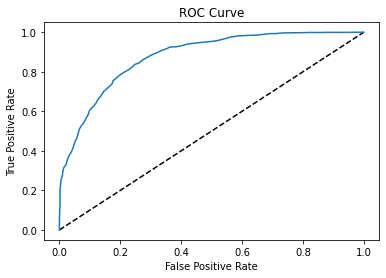

In [6]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=93)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print("RandomForest")
print("____________________________")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("____________________________")
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("____________________________")
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

y_pred_prob = rfc.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("____________________________")
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
#cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
#print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

In [7]:
input_cols = ['Att', 'M', 'R', 'D', 'T', 'A1', 'A2','B1', 'B2', 'G1', 'G2']

In [8]:
# importance = rfc.feature_importances_

# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
    
# # plot feature importance
# pyplot.bar([x for x in input_cols], importance)
# pyplot.figure(figsize=(100,10))
# pyplot.show()

Decision Tree
____________________________
Accuracy: 0.7230721198876053
Precision: 0.7174698795180723
Recall: 0.7402113113735239
F1 Score: 0.7286631997552767
____________________________
Confusion Matrix: 
 [[1125  469]
 [ 418 1191]]
____________________________
False Positive Rate: 0.294228356336261
False Negative Rate: 0.2597886886264761
____________________________
AUC: 0.7229914775186315


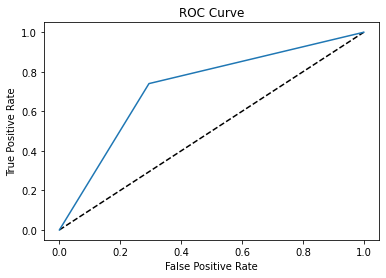

In [9]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Decision Tree")

print("____________________________")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("____________________________")
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("____________________________")
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

y_pred_prob = dt.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("____________________________")
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
#cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
#print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

In [10]:
# importance = dt.feature_importances_

# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
    
# # plot feature importance
# pyplot.bar([x for x in input_cols], importance)
# pyplot.figure(figsize=(100,10))
# pyplot.show()

GNB
____________________________
Accuracy: 0.5722759912581954
Precision: 0.632630410654828
Recall: 0.35425730267246736
F1 Score: 0.4541832669322709
____________________________
Confusion Matrix: 
 [[1263  331]
 [1039  570]]
____________________________
False Positive Rate: 0.2076537013801757
False Negative Rate: 0.6457426973275326
____________________________
AUC: 0.612867317075453


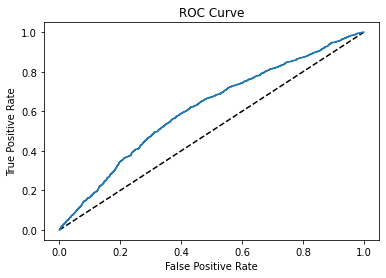

In [11]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None , var_smoothing = 0.50)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("GNB")

print("____________________________")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("____________________________")
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("____________________________")
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

y_pred_prob = gnb.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("____________________________")
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
#cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
#print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

In [12]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(gnb, X_test, y_test)
print(imps.importances_mean)

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.05419919  0.01379956 -0.00062441  0.00037465  0.00012488
  0.00018732 -0.00012488  0.00012488]


KNN
____________________________
Accuracy: 0.562285357477365
Precision: 0.5595169637722829
Recall: 0.6047234307022996
F1 Score: 0.581242532855436
____________________________
Confusion Matrix: 
 [[828 766]
 [636 973]]
____________________________
False Positive Rate: 0.4805520702634881
False Negative Rate: 0.3952765692977004
____________________________
AUC: 0.5966526509837621


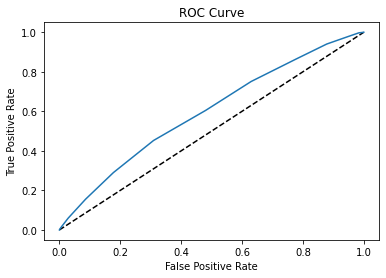

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNN")
print("____________________________")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("____________________________")
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("____________________________")
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

y_pred_prob = knn.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("____________________________")
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
#cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
#print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

GBC
____________________________
Accuracy: 0.7705276303465501
Precision: 0.7466139954853274
Recall: 0.8222498446239901
F1 Score: 0.782608695652174
____________________________
Confusion Matrix: 
 [[1145  449]
 [ 286 1323]]
____________________________
False Positive Rate: 0.2816813048933501
False Negative Rate: 0.1777501553760099
____________________________
AUC: 0.8514320716359437


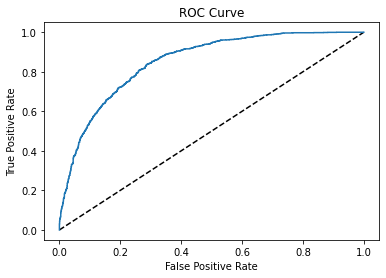

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0, learning_rate=0.01, max_depth=29, n_estimators=200,subsample=0.1 )
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print("GBC")

print("____________________________")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("____________________________")
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("____________________________")
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

y_pred_prob = gbc.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("____________________________")
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
#cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
#print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

In [15]:
# importance = gbc.feature_importances_

# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
    
# # plot feature importance
# pyplot.bar([x for x in input_cols], importance)
# pyplot.figure(figsize=(100,10))
# pyplot.show()

XGB
____________________________
Accuracy: 0.7992507024664377
Precision: 0.7756849315068494
Recall: 0.8446239900559354
F1 Score: 0.8086878905087771
____________________________
Confusion Matrix: 
 [[1201  393]
 [ 250 1359]]
____________________________
False Positive Rate: 0.24654956085319946
False Negative Rate: 0.15537600994406464
____________________________
AUC: 0.8825396355038667


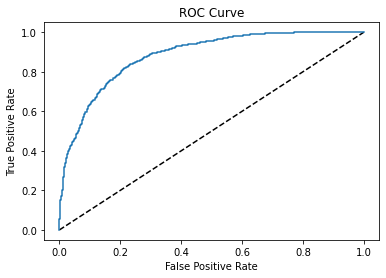

In [16]:
from xgboost import XGBClassifier
xgb = XGBClassifier(colsample_bytree=0.7,gamma=0.3,learning_rate=0.05,max_depth=12)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("XGB")

print("____________________________")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("____________________________")
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("____________________________")
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

y_pred_prob = xgb.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("____________________________")
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
#cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
#print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

In [17]:
# importance = xgb.feature_importances_

# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
    
# # plot feature importance
# pyplot.bar([x for x in input_cols], importance)
# pyplot.figure(figsize=(100,10))
# pyplot.show()

Bagging
____________________________
Accuracy: 0.7989384951607867
Precision: 0.7709152161706906
Recall: 0.853325046612803
F1 Score: 0.8100294985250738
____________________________
Confusion Matrix: 
 [[1186  408]
 [ 236 1373]]
____________________________
False Positive Rate: 0.25595984943538264
False Negative Rate: 0.14667495338719705
____________________________
AUC: 0.8759615961970503


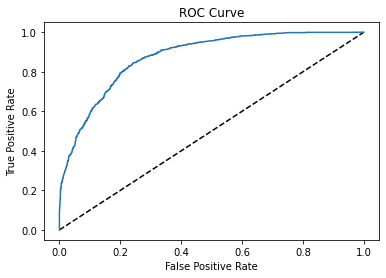

In [18]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(base_estimator=rfc, n_estimators=20, random_state=1)
bc.fit(X_train, y_train)

y_pred = bc.predict(X_test)
print("Bagging")
print("____________________________")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("____________________________")
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

tpr = recall_score(y_test, y_pred) 
tnr = recall_score(y_test, y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr
print("____________________________")
print("False Positive Rate:",fpr)
print("False Negative Rate:",fnr)

y_pred_prob = bc.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("____________________________")
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
#cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
#print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()